# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof:Juan Marcos Marín Ramírez
### Estudiante: Juan Josè Usuga Giraldo 1020482080

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [101]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [102]:
A = np.array([[ 1,  2, -3,  4,  5],
              [-2, -5,  8, -8, -9],
              [ 1,  2, -2,  7,  9],
              [ 1,  1,  0,  6, 12],
              [ 2,  4, -6,  8, 11]])

In [103]:
mensaje_encriptado = np.array([47, 49, -19, 257, 487, 10, -9, 63, 137, 236, 79, 142, -184, 372, 536, 59, 70, -40, 332, 588])

In [104]:
mensaje_encriptado = mensaje_encriptado.reshape(4, 5)
A_inv = np.linalg.inv(A)
mensaje_decodificado = np.round(mensaje_encriptado @ A_inv)
alfabeto = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
mensaje_texto = "".join([alfabeto[int(x) - 1] for x in mensaje_decodificado.flatten() if x > 0 and x <= 27])
print(mensaje_texto)

ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

In [105]:
N = 10
x1 = np.linspace(0, 10, N)
noise = 2*np.random.random(N)-1
y = 0.9*x1 + noise
X = np.vstack([np.ones(N), x1]).T
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(f"Intersección (θ0): {theta[0]}")
print(f"Pendiente (θ1): {theta[1]}")

Intersección (θ0): -0.4221367991056729
Pendiente (θ1): 0.936369335499991


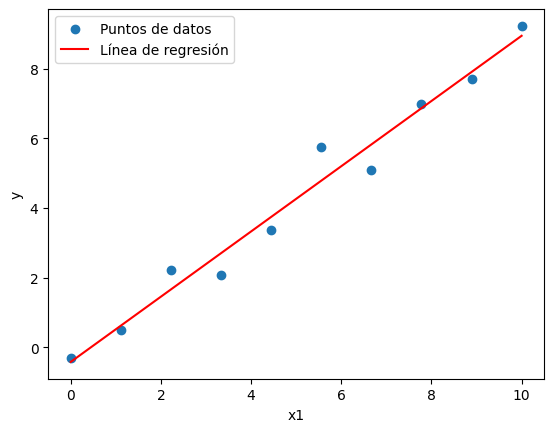

In [106]:
plt.scatter(x1, y, label="Puntos de datos")
plt.plot(x1, X @ theta, color='red', label="Línea de regresión")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [107]:
A = np.array([[2, -1, 1],
              [0,  3, -1],
              [2,  1, 3]])

In [108]:
valores_propios, vectores_propios = np.linalg.eig(A)
D = np.diag(valores_propios)
U = vectores_propios
print("Valores propios:", valores_propios)
print("Vectores propios:\n", vectores_propios)

Valores propios: [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]
Vectores propios:
 [[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]


In [109]:
np.allclose(A, U @ D @ np.linalg.inv(U))

True

In [110]:
t = np.linspace(0, 2, 100)  # Intervalo de tiempo [0, 2]
e_Dt = np.zeros((len(t), D.shape[0], D.shape[1]), dtype=complex)

for i in range(len(t)):
  e_Dt[i] = np.diag(np.exp(valores_propios * t[i]))

In [111]:
e_At = np.zeros((len(t), A.shape[0], A.shape[1]), dtype=complex)

for i in range(len(t)):
  e_At[i] = U @ e_Dt[i] @ np.linalg.inv(U)

In [112]:
r0 = np.array([1, 1, 2])  # Condiciones iniciales: r(0) = (1, 1, 2)
r_t = np.zeros((len(t), 3), dtype=complex)
for i in range(len(t)):
  r_t[i] = e_At[i] @ r0

x_t = r_t[:, 0]
y_t = r_t[:, 1]
z_t = r_t[:, 2]

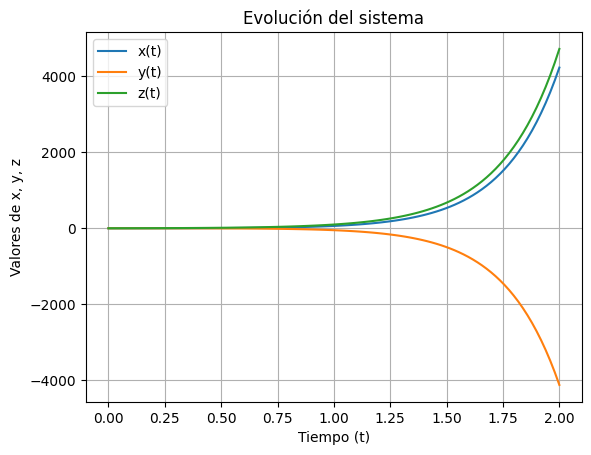

In [113]:
plt.plot(t, x_t.real, label='x(t)')  # .real para obtener la parte real
plt.plot(t, y_t.real, label='y(t)')
plt.plot(t, z_t.real, label='z(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Valores de x, y, z')
plt.title('Evolución del sistema')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
# Define la condición inicial r(0) = (1, 1, 2)
r0 = np.array([1, 1, 2])
# Calcula r(t)
r_t = np.zeros((len(t), 3), dtype=complex)
for i in range(len(t)):
    r_t[i] = e_At[i] @ r0
x_t = r_t[:, 0]
y_t = r_t[:, 1]
z_t = r_t[:, 2]

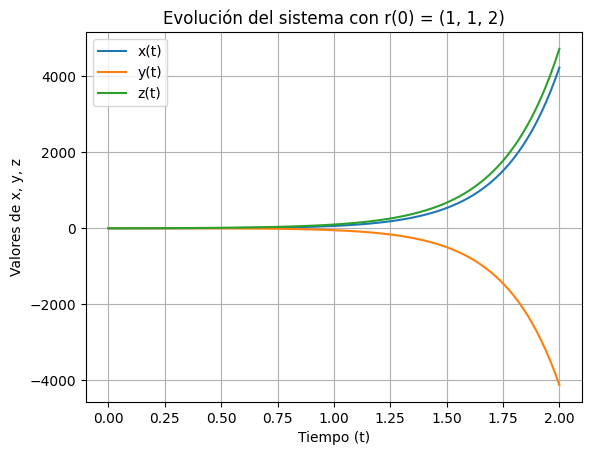

In [115]:
plt.plot(t, x_t.real, label='x(t)')
plt.plot(t, y_t.real, label='y(t)')
plt.plot(t, z_t.real, label='z(t)')

plt.xlabel('Tiempo (t)')
plt.ylabel('Valores de x, y, z')
plt.title('Evolución del sistema con r(0) = (1, 1, 2)')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
def x_analitica(t, x0, y0, z0):
       return 0.5 * (x0 * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) +
                   y0 * (-2*t * np.exp(2*t)) +
                   z0 * (np.exp(2*t) * (-1 + np.exp(2*t))))
def y_analitica(t, x0, y0, z0):
       return 0.5 * (x0 * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) +
                   y0 * (2 * (t + 1) * np.exp(2*t)) +
                   z0 * (-np.exp(2*t) * (-1 + np.exp(2*t))))
def z_analitica(t, x0, y0, z0):
       return 0.5 * (x0 * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) +
                   y0 * (2*t * np.exp(2*t)) +
                   z0 * (np.exp(2*t) * (1 + np.exp(2*t))))

In [117]:
x0, y0, z0 = r0  # Condiciones iniciales (1, 1, 2)
x_analitica_t = x_analitica(t, x0, y0, z0)
y_analitica_t = y_analitica(t, x0, y0, z0)
z_analitica_t = z_analitica(t, x0, y0, z0)

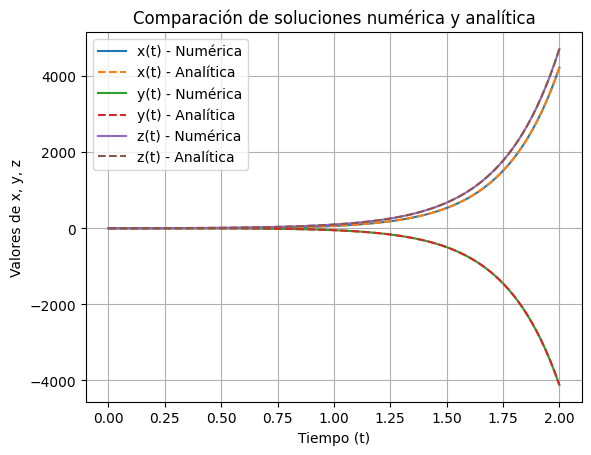

In [118]:
plt.plot(t, x_t.real, label='x(t) - Numérica')
plt.plot(t, x_analitica_t, label='x(t) - Analítica', linestyle='--')

plt.plot(t, y_t.real, label='y(t) - Numérica')
plt.plot(t, y_analitica_t, label='y(t) - Analítica', linestyle='--')

plt.plot(t, z_t.real, label='z(t) - Numérica')
plt.plot(t, z_analitica_t, label='z(t) - Analítica', linestyle='--')

plt.xlabel('Tiempo (t)')
plt.ylabel('Valores de x, y, z')
plt.title('Comparación de soluciones numérica y analítica')
plt.legend()
plt.grid(True)
plt.show()

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [119]:
A = np.array([[0, 2],
              [0.3, 0.5]])

p0 = np.array([0, 10])

In [120]:
n_años = 20

p = [p0]
for i in range(n_años):
    p_siguiente = A @ p[-1]
    p.append(p_siguiente)

In [121]:
razones = []  # Lista para almacenar las razones
for i in range(1, n_años + 1):
    razon = p[i][0] / p[i][1]  # Calcula la razón entre juveniles y adultos
    razones.append(razon)

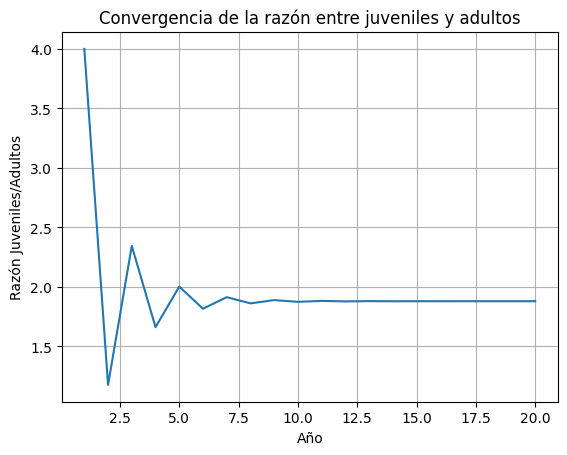

Razón final: 1.88


In [122]:
plt.plot(range(1, n_años + 1), razones)
plt.xlabel('Año')
plt.ylabel('Razón Juveniles/Adultos')
plt.title('Convergencia de la razón entre juveniles y adultos')
plt.grid(True)
plt.show()
print(f"Razón final: {razones[-1]:.2f}")

#Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

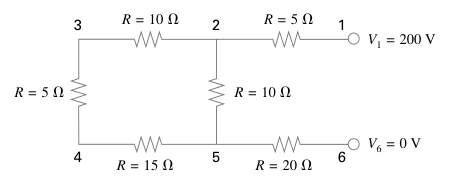

In [123]:
# Datos del circuito
nodos = [1, 2, 3, 4, 5, 6]
resistencias = [(1, 2, 5), (2, 3, 10), (2, 5, 10), (3, 4, 5), (4, 5, 15), (5, 6, 20)]
voltajes = [(1, 200), (6, 0)]
# Número de nodos
n = len(nodos)

In [124]:
# Crear la matriz de conductancias y el vector de corrientes
G = np.zeros((n, n))
I = np.zeros(n)

In [125]:
for nodoA, nodoB, resistencia in resistencias:
    conductancia = 1 / resistencia
    G[nodoA - 1, nodoA - 1] += conductancia
    G[nodoB - 1, nodoB - 1] += conductancia
    G[nodoA - 1, nodoB - 1] -= conductancia
    G[nodoB - 1, nodoA - 1] -= conductancia

In [126]:
for nodo, voltaje in voltajes:
    if nodo != 6:  # Nodo 6 es la referencia (0V)
        I[nodo - 1] = voltaje * G[nodo - 1, nodo - 1]

In [127]:
V = np.linalg.solve(G, I)
corrientes_ramas = {}
for nodoA, nodoB, resistencia in resistencias:
    corriente = (V[nodoA - 1] - V[nodoB - 1]) / resistencia
    corrientes_ramas[f"I{nodoA}{nodoB}"] = corriente
print("Voltajes en los nodos:")
for i, nodo in enumerate(nodos):
    print(f"V{nodo}: {V[i]:.2f} V")
print("\nCorrientes en las ramas:")
for rama, corriente in corrientes_ramas.items():
    print(f"{rama}: {corriente:.2f} A")

Voltajes en los nodos:
V1: 960767920505705088.00 V
V2: 960767920505704960.00 V
V3: 960767920505704704.00 V
V4: 960767920505704960.00 V
V5: 960767920505704960.00 V
V6: 960767920505704832.00 V

Corrientes en las ramas:
I12: 25.60 A
I23: 25.60 A
I25: 0.00 A
I34: -51.20 A
I45: 0.00 A
I56: 6.40 A
